In [1]:
%cd /content/drive/MyDrive/Python BusAn

/content/drive/MyDrive/Python BusAn


In [2]:
#imported libraries that I (might) need
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler #multilinear setup and training for these next 2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score #needed for accuracy assessment during multilinear regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree
import matplotlib.pyplot as plt #these last two to plot the tree
from sklearn.tree import plot_tree

In [3]:
#Loading the data and describing it
df = pd.read_csv("salaries.csv")
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [4]:
df.head(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
#checking for any null values first
df.isnull().sum()
#no missing values!

,0
rank,0
discipline,0
yrs.since.phd,0
yrs.service,0
sex,0
salary,0


In [6]:
#convert categorical variables to numerical variables with pandas
df['rank'] = df['rank'].astype('category').cat.codes
df['discipline'] = df['discipline'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes

In [7]:
df.describe(include='all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<Axes: >

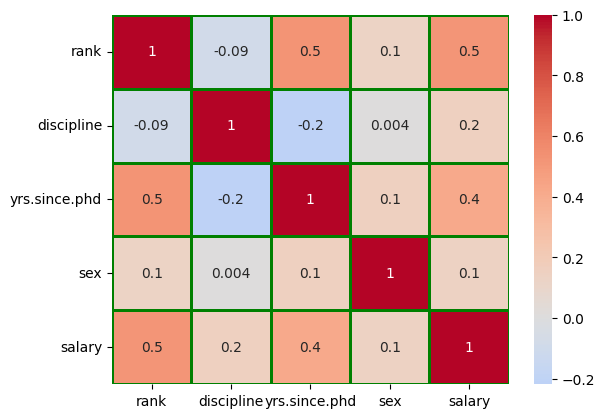

In [18]:
#Correlation Matrix creation
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = "coolwarm",
            linewidths = 1,
            linecolor = 'green')

<Axes: xlabel='yrs.since.phd', ylabel='yrs.service'>

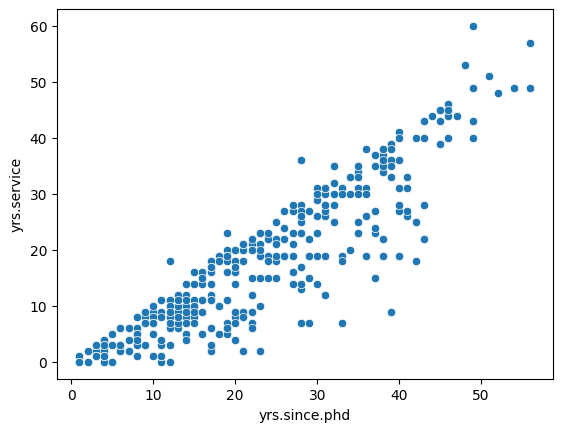

In [9]:
sns.scatterplot(data=df, x="yrs.since.phd", y="yrs.service")
#we made the conclusion through the previous graph that the two variables "yrs.since.phd" and "yrs.service" were highly correlated and could possibly be merged into one variable or have one dropped
#consequently, this scatterplot was made between the two, which shows that there is extreme overlap and collinearity between the two variables by having a majority of data points either on top of or very close to each other.

In [10]:
df = df.drop(columns = ["yrs.service"])

In [12]:
# Exclude the target variable ('Salary') since you're not standardizing it
X = df.drop(columns=['salary'])
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_standarized = scaler.fit_transform(X)

In [13]:
# Convert to a dataframe
X_standarized = pd.DataFrame(X_standarized, columns=X.columns)

# Display the standardized dataset
X_standarized.head()

,rank,discipline,yrs.since.phd,sex
0,0.649257,0.915403,-0.257550,0.330058
1,0.649257,0.915403,-0.179854,0.330058
2,-0.672564,0.915403,-1.422982,0.330058
3,0.649257,0.915403,1.762533,0.330058
4,0.649257,0.915403,1.374055,0.330058


In [14]:
#Prepare X and Y
y = df['salary']
X_standarized = sm.add_constant(X)

In [15]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standarized, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [16]:
#Regression model
model = sm.OLS(y_train1, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     48.21
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.52e-31
Time:                        16:20:33   Log-Likelihood:                -3639.7
No. Observations:                 317   AIC:                             7289.
Df Residuals:                     312   BIC:                             7308.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.095e+04   5176.287     11.775

In [19]:
#note here, sex is statistically significant, will be fine tuned later
#predictions for multilinear regression model
predictions_multilinear = model.predict(X_test1)

In [20]:
predictions_multilinear

,0
364,123755.410057
30,129084.275811
378,121247.522248
188,97251.171389
155,129585.853373
...,...
343,134601.628991
366,109711.238328
79,104139.327488
135,112219.126136


In [21]:
results_multilinear = pd.DataFrame({
    'Actual': y_test1.values.astype(int),
    'Predicted': predictions_multilinear.values.astype(int)})
results_multilinear

,Actual,Predicted
0,205500,123755
1,132261,129084
2,150680,121247
3,106300,97251
4,118971,129585
...,...,...
75,162150,134601
76,115435,109711
77,84240,104139
78,136000,112219


In [22]:
#accuracy assesment of the model, preliminary look from the code above says it looks pretty good, generally predicting around the actual numbers and not too close
print("MAE:", round(mean_absolute_error(y_test1, predictions_multilinear), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test1, predictions_multilinear)), 0))

MAE: 21054.0
RMSE: 27059.0


In [24]:
#dfft (df fine-tuned) is created by excluding the statistically significant variable "sex" that we identified earlier
dfft = df.drop(columns=['sex'])

In [27]:
# Same steps as last time
X1 = dfft.drop(columns=['salary'])
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_standarized = scaler.fit_transform(X1)

# Convert to a dataframe
X_standarized = pd.DataFrame(X_standarized, columns=X1.columns)

# Display the standardized dataset
X_standarized.head()

#Prepare X and Y
y = df['salary']
X_standarized = sm.add_constant(X1)

#Training and Test Set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_standarized, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [28]:
#New Fine-Tuned Regression model
model = sm.OLS(y_train1, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     63.75
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           3.39e-32
Time:                        16:43:13   Log-Likelihood:                -3640.4
No. Observations:                 317   AIC:                             7289.
Df Residuals:                     313   BIC:                             7304.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.502e+04   3820.221     17.020

In [29]:
#predictions for fine tuned model
predictions_multilinear = model.predict(X_test1)

In [30]:
predictions_multilinear

,0
364,123547.739694
30,128719.032201
378,120941.889988
188,96770.311733
155,129240.202142
...,...
343,134451.901554
366,108954.981341
79,103363.613026
135,111560.831047


In [31]:
results_multilinear = pd.DataFrame({
    'Actual': y_test1.values.astype(int),
    'Predicted': predictions_multilinear.astype(int)
})

In [32]:
# & results
results_multilinear

,Actual,Predicted
364,205500,123547
30,132261,128719
378,150680,120941
188,106300,96770
155,118971,129240
...,...,...
343,162150,134451
366,115435,108954
79,84240,103363
135,136000,111560


In [34]:
#accuracy assessmentもう一回
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print("MAE:", round(mean_absolute_error(y_test1, predictions_multilinear), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test1, predictions_multilinear)), 0))

MAE: 21003.0
RMSE: 27065.0


In [35]:
#Tree Regression time!
#training and test setいつものに
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [37]:
#そしてinitializing & training the tree model
#side note, just used the random state of 42 because it was what we used in class and i didn't feel like it needed to be changed based on the data
tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [38]:
# Get feature importance
feature_importances = tree_model.feature_importances_

In [40]:
#df created to display feature importance with feature names
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)
#there aren't a whole lot of variables to begin with, but i still did drop "sex"
#as it was significantly less important on the scale

         Feature  Importance
0           rank    0.590809
2  yrs.since.phd    0.287520
1     discipline    0.100475
3            sex    0.021196


In [41]:
#Creating new df and X
df2 = df.drop(columns=["sex"])
X2 = df2.drop(columns=["salary"])

In [42]:
#Training and Test Setはいまたやります～
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [43]:
#making predictions on the test set for the tree regression
predictions_tree = tree_model.predict(X_test2)

In [44]:
#Results for the tree regression
results_multilinear = pd.DataFrame({
    'Actual': y_test2.values.astype(int),
    'Predicted': predictions_tree.astype(int)
})
results_multilinear

,Actual,Predicted
0,205500,122488
1,132261,142923
2,150680,112410
3,106300,105350
4,118971,120570
...,...,...
75,162150,168610
76,115435,114330
77,84240,86770
78,136000,108959


In [45]:
#performance metrics!
print("MAE:", round(mean_absolute_error(y_test2, predictions_tree), 0))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test2, predictions_tree)), 0))

MAE: 19341.0
RMSE: 27928.0


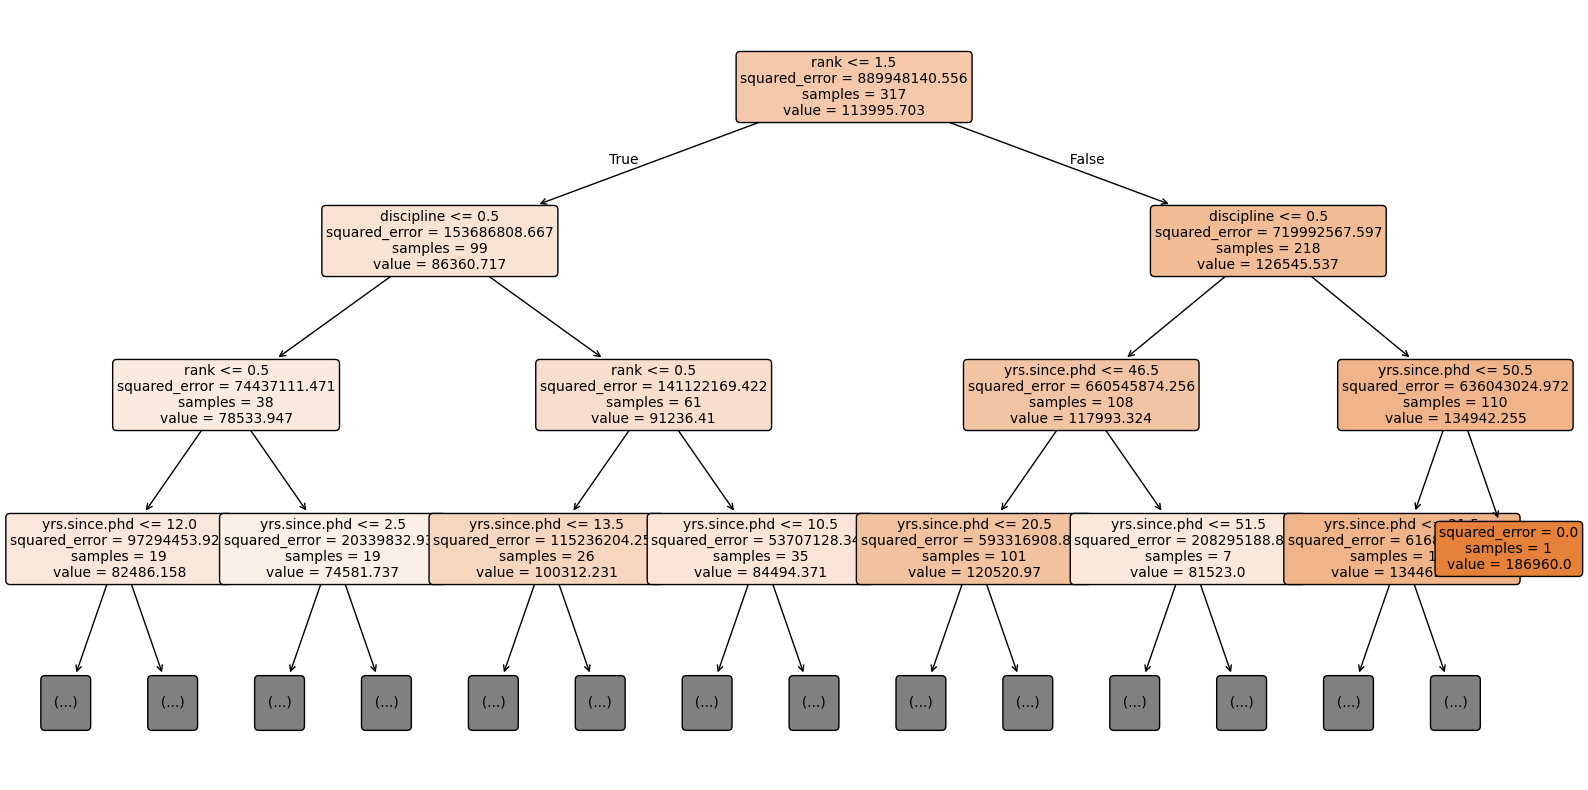

In [46]:
#Plotting the tree! kinda smushed but i guess the dimensions and adjustments we used in class still work here!
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X2.columns, max_depth=3, filled=True, rounded=True,fontsize=10)
plt.show()